In [2]:
# Set up
%pylab
%pylab inline
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tqdm
import random
import pandas as pd
from collections import Counter
from itertools import cycle

from sklearn import datasets, metrics
from sklearn.cluster import KMeans, Birch, DBSCAN
from sklearn.decomposition import PCA

import seaborn as sns 

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


# Zadanie 2. (2 punkty)
Normalizacja danych to przeskalowanie oryginalnych zarejestrowanych wartości cech na wartości <br/>
z przedziału [0, 1] dokonywane za pomocą przekształcenia x’ = (x – xmin) / (xmax – xmin), <br/>
gdzie x’ to przeskalowana wartość, x to wartość oryginalna, zaś xmin i xmax to odpowiednio minimalna <br/>
i maksymalna zarejestrowana wartość cechy (normalizacji dokonuje się dla każdej cechy osobno). <br/>
Standaryzacja danych to przeskalowanie oryginalnych zarejestrowanych wartości cech na wartości <br/>
o rozkładzie N(0, 1) dokonywane za pomocą przekształcenia x’ = (x – m) / s, gdzie x’ to <br/>
przeskalowana wartość, x to wartość oryginalna, zaś m i s to odpowiednio średnia i odchylenie <br/>
standardowe zarejestrowanych wartości cechy (standaryzacji dokonuje się dla każdej cechy osobno). <br/>
<br/>
Czy normalizacja lub standaryzacja danych może mieć wpływ na działanie algorytmu K-Means?<br/>
Jeśli tak, to skonstruuj proste przykłady pokazujące, że dane znormalizowane lub<br/>
ustandaryzowane są lepiej grupowane niż dane oryginalne. Zrób stosowne rysunki.<br/>
A jak jest w przypadku algorytmów BIRCH i DBScan? <br/>

In [243]:
def plotClustering(X, plt_labels, centers=None, features=(0,1), ax=plt):
    if features[0] == features[1]:
        ax.hist(
            X[:, features[0]],
            edgecolor='black'
        )
    else:
        ax.scatter(
            X[:,features[0]],
            X[:,features[1]],
            c=plt_labels,
            edgecolor='black',
            alpha=0.8
        )
        if centers:
            ax.scatter(
            centers[:,features[0]],
            centers[:,features[1]],
            c=np.arange(len(centers)),
            edgecolor='red',
            s=100,
            marker='D'
        )

In [238]:
X1 = np.random.rand(10000, 2) * np.array([1, 1000])
X2 = np.random.rand(10000, 2) * np.array([1, 1000]) + np.array([3, 0])

X = np.concatenate((X1, X2))[:, 0]
Y = np.concatenate((X1, X2))[:, 1]

X_norm = (X - np.min(X)) / (np.max(X) - np.min(X))
Y_norm = (Y - np.min(Y)) / (np.max(Y) - np.min(Y))

X_std = (X - X.mean()) / X.std()
Y_std = (Y - Y.mean()) / Y.std()

r = [1, 10]

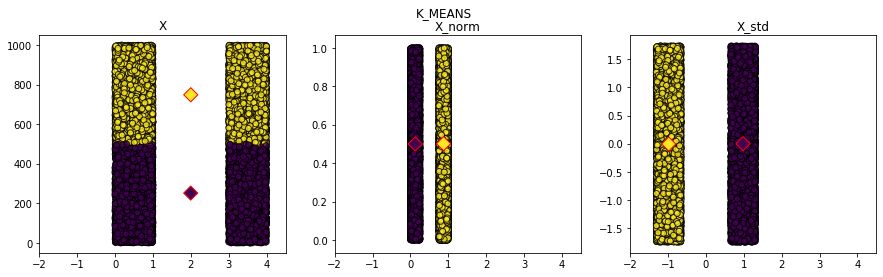

In [239]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,4)
fig.suptitle('K_MEANS')
for i, data in enumerate([np.c_[X, Y], np.c_[X_norm, Y_norm], np.c_[X_std, Y_std]]):
    model = KMeans(n_clusters=2)
    model.fit(data)
    plotClustering(data, model.labels_, model.cluster_centers_, ax=axes[i])
    axes[i].set_title(['X', 'X_norm','X_std'][i])
    axes[i].set_xlim((-2, 4.5))

Wall time: 1.7 s


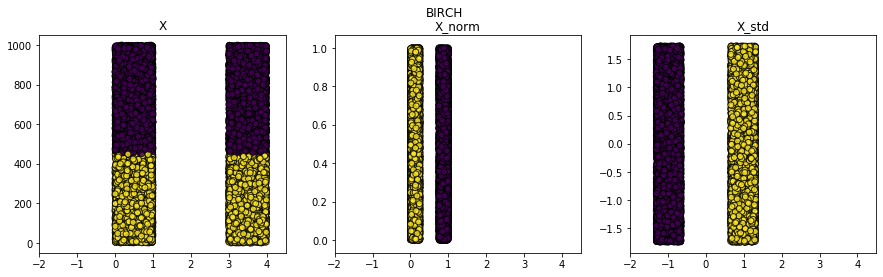

In [245]:
%%time
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,4)
fig.suptitle('BIRCH')
for i, data in enumerate([np.c_[X, Y], np.c_[X_norm, Y_norm], np.c_[X_std, Y_std]]):
    model = Birch(n_clusters=2, threshold=0.4, branching_factor=100)
    model.fit(data)
    centers=model.subcluster_centers_
    plotClustering(data, model.labels_, centers=None, ax=axes[i])
    axes[i].set_title(['X', 'X_norm','X_std'][i])
    axes[i].set_xlim((-2, 4.5))

Wall time: 1.1 s


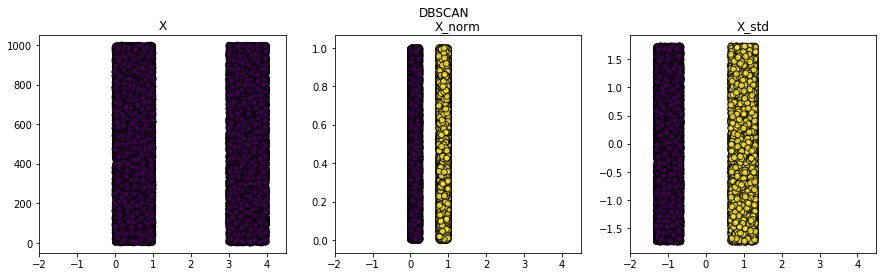

In [247]:
%%time
fig, axes = plt.subplots(1,3)
fig.set_size_inches(15,4)
fig.suptitle('DBSCAN')
for i, data in enumerate([np.c_[X, Y], np.c_[X_norm, Y_norm], np.c_[X_std, Y_std]]):
    model = DBSCAN(eps=0.1)
    model.fit(data)
    plotClustering(data, model.labels_, centers=None, ax=axes[i])
    axes[i].set_title(['X', 'X_norm','X_std'][i])
    axes[i].set_xlim((-2, 4.5))